In [3]:
import autorootcwd

In [4]:
import pandas as pd

In [16]:
# read history from file
df_history_bayesian = pd.read_csv('Wyniki/bayesian-search-history.csv')
df_history_random = pd.read_csv('Wyniki/random-search-history.csv')
df_baselines = pd.read_csv('Wyniki/baselines.csv')
df_best_bayesian = pd.read_csv('Wyniki/bayesian-search-best.csv')
df_best_random = pd.read_csv('Wyniki/random-search-best.csv')

In [6]:
df_history_bayesian

,dataset,model,score,hyperparameters,iteration
0,iris,KNN,0.9800,"{'n_neighbors': 7.0, 'p': 1, 'weights': 1}",0
1,iris,KNN,0.9467,"{'n_neighbors': 2.0, 'p': 1, 'weights': 0}",1
2,iris,KNN,0.9467,"{'n_neighbors': 26.0, 'p': 1, 'weights': 0}",2
3,iris,KNN,0.9800,"{'n_neighbors': 7.0, 'p': 1, 'weights': 0}",3
4,iris,KNN,0.9800,"{'n_neighbors': 11.0, 'p': 0, 'weights': 0}",4
...,...,...,...,...,...
595,breast_cancer,XGBoost,0.9754,"{'colsample_bytree': 0.8776809009567628, 'lear...",45
596,breast_cancer,XGBoost,0.9649,"{'colsample_bytree': 0.8387602939120784, 'lear...",46
597,breast_cancer,XGBoost,0.9701,"{'colsample_bytree': 0.6566943315520308, 'lear...",47
598,breast_cancer,XGBoost,0.9701,"{'colsample_bytree': 0.9195044589031727, 'lear...",48


In [7]:
df_history_random

,dataset,model,score,hyperparameters,iteration
0,iris,KNN,0.9800,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 12}",0
1,iris,KNN,0.9733,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",1
2,iris,KNN,0.9600,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 3}",2
3,iris,KNN,0.9800,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",3
4,iris,KNN,0.9800,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 12}",4
...,...,...,...,...,...
595,breast_cancer,XGBoost,0.9736,"{'subsample': 0.6666666666666666, 'n_estimator...",45
596,breast_cancer,XGBoost,0.9771,"{'subsample': 1.0, 'n_estimators': 750, 'max_d...",46
597,breast_cancer,XGBoost,0.9771,"{'subsample': 0.6111111111111112, 'n_estimator...",47
598,breast_cancer,XGBoost,0.9631,"{'subsample': 1.0, 'n_estimators': 600, 'max_d...",48


In [15]:
df_baselines

,dataset,model,score,hyperparameters
0,iris,KNN,0.9733,{}
1,iris,RandomForest,0.9600,{}
2,iris,XGBoost,0.9533,{}
3,digits,KNN,0.9627,{}
4,digits,RandomForest,0.9349,{}
5,digits,XGBoost,0.9182,{}
6,wine,KNN,0.6913,{}
7,wine,RandomForest,0.9610,{}
8,wine,XGBoost,0.9498,{}
9,breast_cancer,KNN,0.9279,{}


In [17]:
df_best_bayesian

,dataset,model,score,hyperparameters,iteration
0,iris,KNN,0.9867,"{'n_neighbors': 11.0, 'p': 1, 'weights': 1}",36
1,iris,RandomForest,0.9667,"{'bootstrap': 0, 'max_depth': 38.0, 'min_sampl...",1
2,iris,XGBoost,0.9667,"{'colsample_bytree': 0.6486170501967776, 'lear...",3
3,digits,KNN,0.9672,"{'n_neighbors': 2.0, 'p': 1, 'weights': 0}",20
4,digits,RandomForest,0.9388,"{'bootstrap': 0, 'max_depth': 45.0, 'min_sampl...",19
5,digits,XGBoost,0.9421,"{'colsample_bytree': 0.5935734181220647, 'lear...",38
6,wine,KNN,0.8094,"{'n_neighbors': 1.0, 'p': 0, 'weights': 1}",35
7,wine,RandomForest,0.9833,"{'bootstrap': 1, 'max_depth': 23.0, 'min_sampl...",24
8,wine,XGBoost,0.9722,"{'colsample_bytree': 0.5056677258468711, 'lear...",21
9,breast_cancer,KNN,0.9385,"{'n_neighbors': 11.0, 'p': 0, 'weights': 1}",3


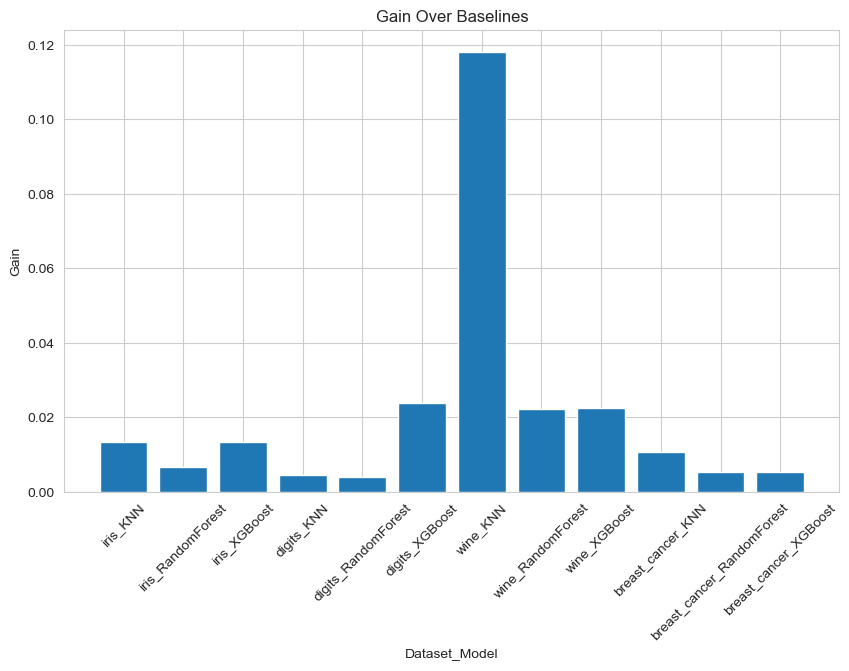

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Assuming df_best_bayesian and df_baselines are already defined

# Calculate gain over baselines
df_gain = df_best_bayesian.copy()
df_gain['gain'] = df_best_bayesian['score'] - df_baselines['score']

# Plot the gain as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_gain['dataset'] + '_' + df_gain['model'], df_gain['gain'])
plt.title('Gain Over Baselines')
plt.xlabel('Dataset_Model')
plt.ylabel('Gain')
plt.xticks(rotation=45)
plt.show()

In [18]:
df_best_random

,dataset,model,score,hyperparameters,iteration
0,iris,KNN,0.9867,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",42
1,iris,RandomForest,0.9667,"{'n_estimators': 1900, 'min_samples_split': 3,...",9
2,iris,XGBoost,0.9667,"{'subsample': 0.6666666666666666, 'n_estimator...",12
3,digits,KNN,0.9672,"{'weights': 'distance', 'p': 2, 'n_neighbors': 4}",7
4,digits,RandomForest,0.9427,"{'n_estimators': 700, 'min_samples_split': 3, ...",13
5,digits,XGBoost,0.9421,"{'subsample': 0.5555555555555556, 'n_estimator...",39
6,wine,KNN,0.7871,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",16
7,wine,RandomForest,0.9833,"{'n_estimators': 1750, 'min_samples_split': 3,...",10
8,wine,XGBoost,0.9778,"{'subsample': 0.5, 'n_estimators': 200, 'max_d...",15
9,breast_cancer,KNN,0.9385,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 9}",37


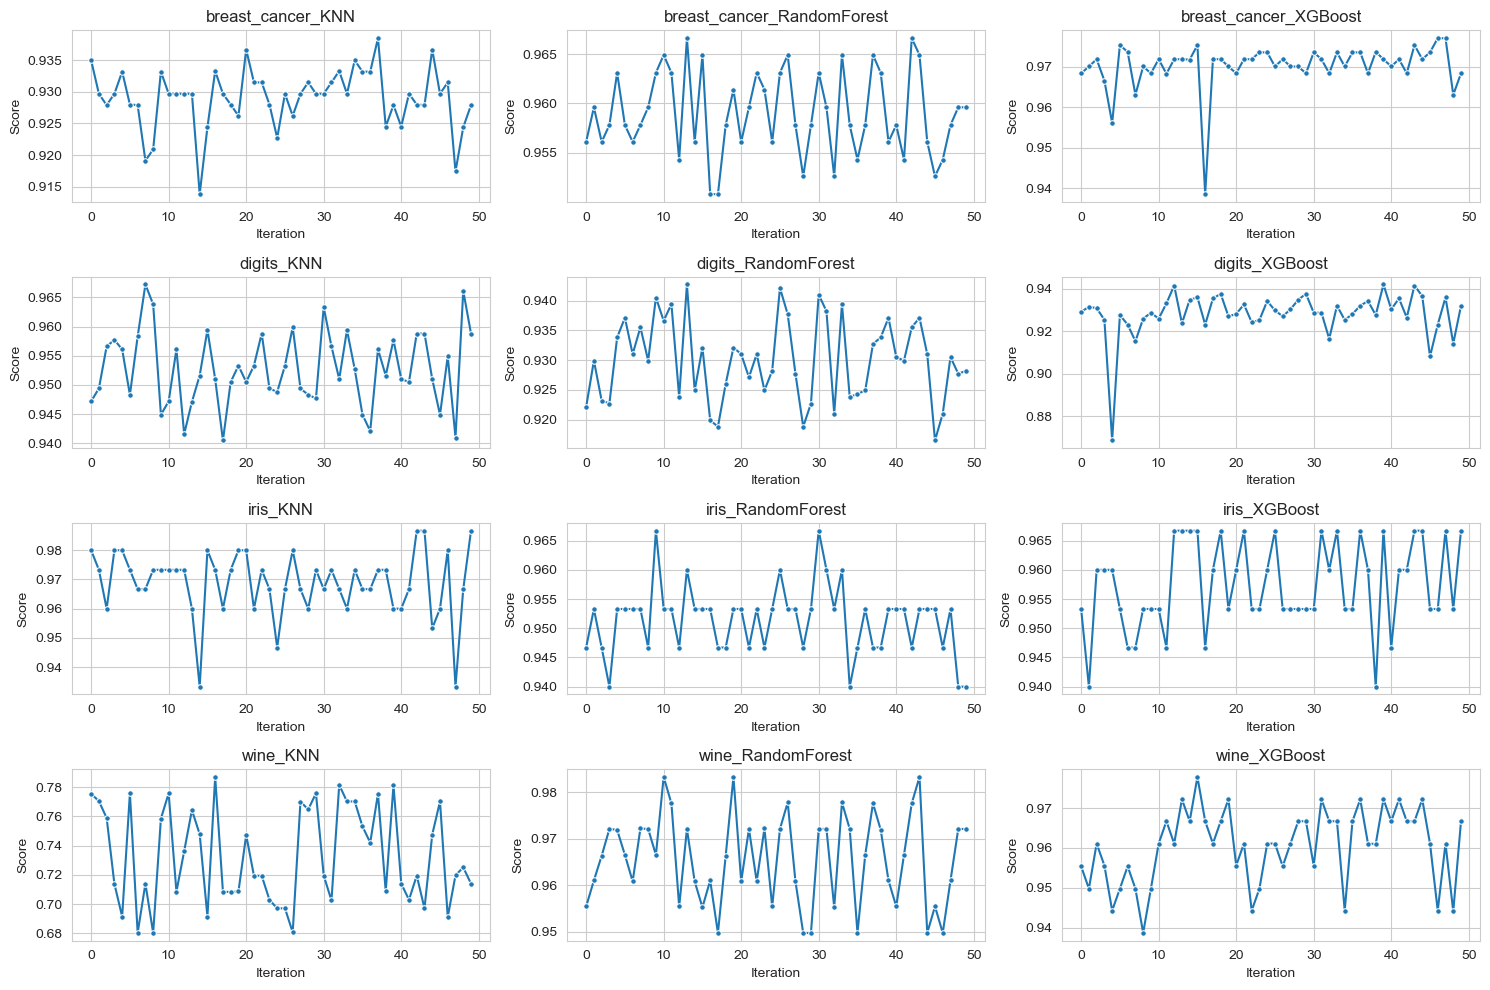

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set the style for the plots
sns.set_style("whitegrid")

# Create a grid of subplots for each combination of dataset and model
unique_combinations = df_history_random['dataset_model'].unique()
num_plots = len(unique_combinations)
num_cols = 3  # Number of columns in the multiplot grid
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows needed

# Create the multiplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot each combination in a separate subplot with custom styling
for i, (combination, data) in enumerate(df_history_random.groupby('dataset_model')):
    row = i // num_cols
    col = i % num_cols
    sns.lineplot(data=data, x='iteration', y='score', ax=axes[row, col], marker='o', linestyle='-', markersize=4)
    axes[row, col].set_title(combination)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Score')

# Remove any unused subplots and adjust layout
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

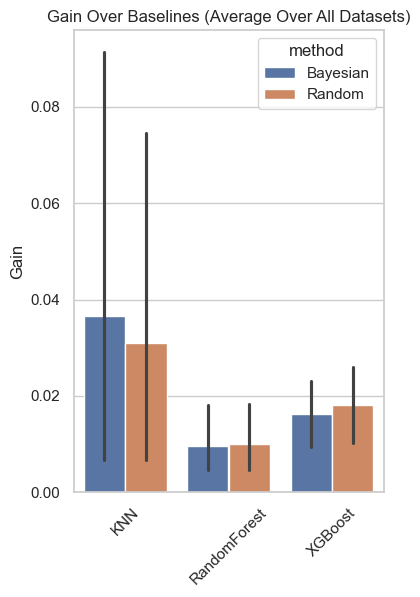

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate gain over baselines for df_best_random
df_gain_random = df_best_random.copy()
df_gain_random['gain'] = df_best_random['score'] - df_baselines['score']
df_gain_random['method'] = 'Random'

# Add a 'method' column to df_gain to indicate the method used
df_gain['method'] = 'Bayesian'

# Concatenate the two dataframes
df_all = pd.concat([df_gain, df_gain_random])

# Create the multi-bar plot without confidence bars
plt.figure(figsize=(4, 6))
sns.set(style="whitegrid")  # Set the style for the plots
sns.barplot(data=df_all, x=df_all['model'], y='gain', hue='method')
plt.title('Gain Over Baselines (Average Over All Datasets)')
plt.xlabel('')
plt.ylabel('Gain')
plt.xticks(rotation=45)
plt.show()

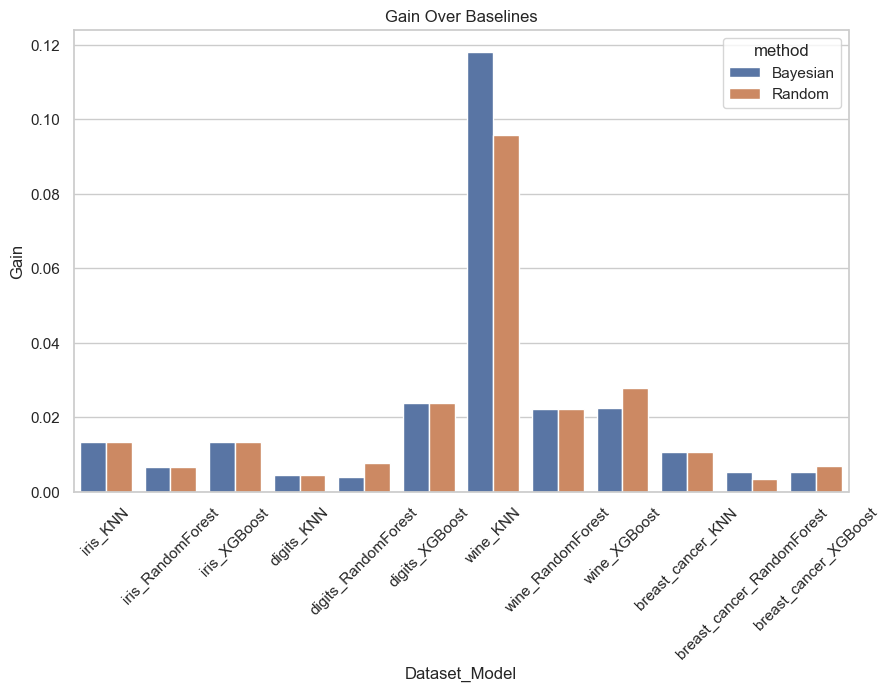

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate gain over baselines for df_best_random
df_gain_random = df_best_random.copy()
df_gain_random['gain'] = df_best_random['score'] - df_baselines['score']
df_gain_random['method'] = 'Random'

# Add a 'method' column to df_gain to indicate the method used
df_gain['method'] = 'Bayesian'

# Concatenate the two dataframes
df_all = pd.concat([df_gain, df_gain_random])

# Create the multi-bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_all, x=df_all['dataset'] + '_' + df_all['model'], y='gain', hue='method')
plt.title('Gain Over Baselines')
plt.xlabel('Dataset_Model')
plt.ylabel('Gain')
plt.xticks(rotation=45)
plt.show()